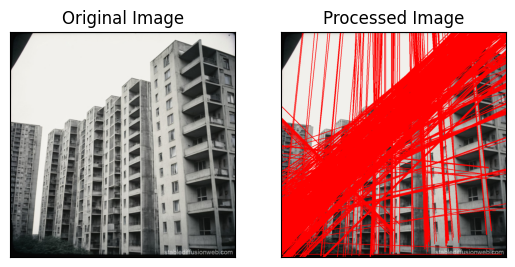

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_straight_lines(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect edges using Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Apply Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return image

def create_straight_lines_image():
    # Create a blank image with straight lines
    image = np.zeros((512, 512, 3), np.uint8)
    cv2.line(image, (100, 100), (400, 100), (255, 0, 0), 5)
    cv2.line(image, (100, 200), (400, 200), (255, 0, 0), 5)
    cv2.line(image, (100, 300), (400, 300), (255, 0, 0), 5)
    cv2.line(image, (100, 400), (400, 400), (255, 0, 0), 5)
    cv2.line(image, (100, 100), (100, 400), (255, 0, 0), 5)
    cv2.line(image, (200, 100), (200, 400), (255, 0, 0), 5)
    cv2.line(image, (300, 100), (300, 400), (255, 0, 0), 5)
    cv2.line(image, (400, 100), (400, 400), (255, 0, 0), 5)
    return image

# Generate the straight lines image
# image = create_straight_lines_image()
# image = cv2.imread('sticks.jpg')
image = cv2.imread('building.jpg')

# Process the image to detect straight lines
processed_image = detect_straight_lines(image.copy())

# Display the original and processed images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.xticks([])
plt.yticks([])

plt.show()
